In [12]:
from mnist_loader import load_mnist
from models import DNN
from image_ops import normalize_image_array
from functions import train_val_split, one_hot_encoding
import numpy as np
import matplotlib.pyplot as plt

print("All necessary packages have been imported!")

All necessary packages have been imported!


In [13]:
x_train, x_test, t_train, t_test = load_mnist()
x_train, t_train, x_val, t_val = train_val_split(x=x_train, y=t_train, split_ratio=0.2)

print("Check the size of the training set: ", x_train.shape)
print("Check the size of the training label: ", t_train.shape)
print("Check the size of the validation set: ", x_val.shape)
print("Check the size of the validation label: ", t_val.shape)
print("Check the size of the test set: ", x_test.shape)
print("Check the size of the test label: ", t_test.shape)

Just wait a sec. The data is loading...

Converting train-images.idx3-ubyte to NumPy Array ...
Done
Converting t10k-images.idx3-ubyte to NumPy Array ...
Done
Converting train-labels.idx1-ubyte to NumPy Array ...
Done
Converting t10k-labels.idx1-ubyte to NumPy Array ...
Done
Data has been successfully loaded!

Check the size of the training set:  (48000, 784)
Check the size of the training label:  (48000,)
Check the size of the validation set:  (12000, 784)
Check the size of the validation label:  (12000,)
Check the size of the test set:  (10000, 784)
Check the size of the test label:  (10000,)


In [14]:
x_train = normalize_image_array(x_train)
t_train_onehot = one_hot_encoding(x=t_train, n_out_node=10)

In [ ]:
# GD

dnn = DNN(n_input_node=784, n_hidden_layer=3, n_hlayer_node=256, n_out_node=10, weight_init_std=1)
epoch_size = 1000
max_iter = 1
losses = []
accs = []
for i in range(epoch_size):
    print(f'Epoch {i+1} starts')
    dnn.train(x=x_train, y=t_train_onehot, max_iter=max_iter, learning_rate=0.001, batch_size=x_train.shape[0])
    y_pred, loss = dnn.predict(x=x_train, y=t_train_onehot)
    accuracy = np.sum(np.argmax(y_pred, axis=1) == t_train) / t_train.size
    losses.append(loss)
    accs.append(accuracy)
    print(f'Acc: {accuracy}\n')

In [ ]:
# SGD (without replacement)

dnn_sgd = DNN(n_input_node=784, n_hidden_layer=3, n_hlayer_node=256, n_out_node=10, weight_init_std=1)
batch_size = 1
epoch_size = 50
max_iter = x_train.shape[0]/batch_size
accs = []
for i in range(epoch_size):
    print(f'Epoch {i+1} starts')
    dnn_sgd.train(x=x_train, y=t_train_onehot, max_iter=max_iter, learning_rate=0.001, batch_size=batch_size)
    y_pred, _ = dnn_sgd.predict(x=x_train, y=t_train_onehot)
    accuracy = np.sum(np.argmax(y_pred, axis=1) == t_train) / t_train.size
    accs.append(accuracy)
    print(f'Acc: {accuracy}\n')

In [15]:
# Mini-Batch GD (without replacement)

dnn_batch = DNN(n_input_node=784, n_hidden_layer=3, n_hlayer_node=256, n_out_node=10, weight_init_std=1)
batch_size = 100
epoch_size = 50
max_iter = x_train.shape[0]/batch_size
accs = []
for i in range(epoch_size):
    print(f'Epoch {i+1} starts')
    dnn_batch.train(x=x_train, y=t_train_onehot, max_iter=max_iter, learning_rate=0.001, batch_size=batch_size)
    y_pred, _ = dnn_batch.predict(x=x_train, y=t_train_onehot)
    accuracy = np.sum(np.argmax(y_pred, axis=1) == t_train) / t_train.size
    accs.append(accuracy)
    print(f'Acc: {accuracy}\n')

Epoch 1 starts
Acc: 0.8761666666666666

Epoch 2 starts
Acc: 0.9071458333333333

Epoch 3 starts
Acc: 0.92075

Epoch 4 starts
Acc: 0.928875

Epoch 5 starts
Acc: 0.9393333333333334

Epoch 6 starts
Acc: 0.9420625

Epoch 7 starts
Acc: 0.9399791666666667

Epoch 8 starts
Acc: 0.9512083333333333

Epoch 9 starts
Acc: 0.9587708333333333

Epoch 10 starts
Acc: 0.9645416666666666

Epoch 11 starts
Acc: 0.9624583333333333

Epoch 12 starts
Acc: 0.9689791666666666

Epoch 13 starts
Acc: 0.9682083333333333

Epoch 14 starts
Acc: 0.9738541666666667

Epoch 15 starts
Acc: 0.9713958333333333

Epoch 16 starts
Acc: 0.977625

Epoch 17 starts
Acc: 0.9762916666666667

Epoch 18 starts
Acc: 0.9833125

Epoch 19 starts
Acc: 0.9813958333333334

Epoch 20 starts
Acc: 0.9789583333333334

Epoch 21 starts
Acc: 0.9845625

Epoch 22 starts
Acc: 0.9767083333333333

Epoch 23 starts
Acc: 0.98875

Epoch 24 starts
Acc: 0.9906458333333333

Epoch 25 starts
Acc: 0.9899166666666667

Epoch 26 starts
Acc: 0.9901041666666667

Epoch 27 sta

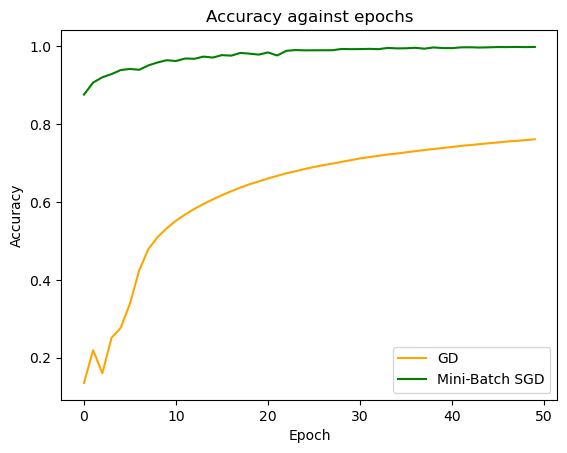

In [ ]:
accs_gd = np.load('nn_gd_accs.npy')

plt.plot(accs_gd[:50], color='orange', label='GD')
plt.plot(accs, color='green', label='Mini-Batch SGD')
plt.title('Accuracy against epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
x_val = normalize_image_array(x_val)
t_val_onehot = one_hot_encoding(x=t_val, n_out_node=10)
y_pred, loss = dnn_batch.predict(x=x_val, y=t_val_onehot)
accuracy = np.sum(np.argmax(y_pred, axis=1) == t_val) / t_val.size
print('Accuracy on the validation set {:.4f}'.format(accuracy))

Accuracy on the validation set 0.9101
